# Luther College Application Data 2013-2014

6046 applicants to Luther College for the 2013-2014 school year

Want to predict whether they get accepted or not into Luther, and also whether they end up attending Luther or not.



Grant Barnes

In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np

from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set()
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

## Import pre-cleaned data

In [2]:
data = pd.DataFrame.from_csv("data_int.csv")

In [3]:
data.columns

Index(['address1', 'address2', 'city', 'region', 'zip', 'entry_term',
       'career_goal_1', 'career_goal_2', 'career_goal_3', 'hs_code', 'hs_name',
       'decision', 'inquiry', 'race', 'hispanic', 'hs_rank', 'hs_size', 'act',
       'sat_verbal', 'sat_math', 'parents_college', 'alumni_child',
       'luther_sibling', 'accepted', 'hs_gpa', 'attending', 'visited',
       'class_percentile', 'distance', 'final'],
      dtype='object')

### Extract Response Variables from Data

In [4]:
attending = data['attending']
attending_array = np.array(attending)

accepted = data['accepted']
accepted_array = np.array(accepted)

final = data['final']
final_array = np.array(final)

In [5]:
temp = data.copy(False)
del temp["accepted"]
del temp['attending']
del temp['final']

data_array = np.array(temp)
data_array = data_array[:,-4:]

### Set up test and training data

In [6]:
x_train_attending, x_test_attending, y_train_attending, y_test_attending = train_test_split(
    data_array, attending_array, test_size=0.2)

x_train_accepted, x_test_accepted, y_train_accepted, y_test_accepted = train_test_split(
    data_array, accepted_array, test_size=0.2)

x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(
    data_array, final_array, test_size=0.2)

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# Analysis

### ------------------------------------------------------------------------------------------------------

### Logisitc Models

$$ E(Y) = P(Y=1) = \frac{e^{x}}{1+e^{x}} $$

where

$$x = \beta_{0} + \beta_{1}*x_{1} + . . .  + \beta_{n}*x_{n} $$

### Model \#1

Response variable: 
            
            Attending (whether or not they decided to come to luther)


Covariates: 

            Distance From Luther
            Whether they visited Luther or not
            High School GPA
            ACT Score
            
            
Using R, since sklearn did not support nan values in logistic model, I found the following coefficients for the model.


$$ x = -3.2240104 - 0.0005415*(dist) + 2.6997458*(visited) + 0.2845320*(gpa) - 0.0361189*(act) $$

So,

$$ P(Attends Luther) = \frac{e^{x}}{1+e^{x}}$$
    
            
Below is a python function that does this calculation for us.

In [7]:
def logistic_attending(dist,visited,hs_gpa,act):
    if visited == "Yes":
        visited = 1
    else:
        visited = 0
    x = -3.2240104 - 0.0005415*(dist) + 2.6997458*(visited) + 0.2845320*(hs_gpa) - 0.0361189*(act)
    
    val = math.exp(x)
    
    answer = str(((val/(1+val))*100)//1.00)+"% chance of attending Luther"
    
    return answer


In [8]:
print(logistic_attending(100,"Yes",4.0,30))
print(logistic_attending(20,"Yes",4.0,25))
print(logistic_attending(500,"No",4.0,30))
print(logistic_attending(2,"Yes",3.0,25))

37.0% chance of attending Luther
42.0% chance of attending Luther
3.0% chance of attending Luther
36.0% chance of attending Luther




### How do we tell how reliable this model is?

We use an ROC curve (receiver operating characteristic). This plots the true positive rate (TPR) against the false positive rate (FPR).

The horizontal line is as good as guessing.  If your curve is below the horizontal line, it is worse than randomly guessing.  If it is above the line, then it is better than guessing.  

The Area Under the Curve (AUC) is a calculated value between 0 and 1.  The closer to 1, the better the model is.

Below is the ROC curve with AUC value on it for this first model.

<img src="roc1.png">

We see that it has an AUC value of 0.7625, which is decent.  Meaning this model does an okay job at finding the probability of a given student who applied to Luther to attend Luther.

### Model \#2

Response variable: 
            
            Accepted (whether or not they are accepted into luther)


Covariates: 

            Whether they visited Luther or not
            High School GPA
            ACT Score
            High School Class Percentile
            
            
Using R, since sklearn did not support nan values in logistic model, I found the following coefficients for the model.


$$ x = -22.031673 + 1.304211*(visited) + 4.005931*(gpa) + 0.539546*(act) + 0.009890*(percentile) $$

So,

$$ P(LutherAccepted) = \frac{e^{x}}{1+e^{x}}$$

Below is a python function that does this calculation for us.

In [9]:
def logistic_accepted(visited,hs_gpa,act,class_percentile):
    if visited == "Yes":
        visited = 1
    else:
        visited = 0
    x = -22.031673 + 1.304211*(visited) + 4.005931*(hs_gpa) + 0.539546*(act) + 0.009890*(class_percentile)
    
    val = math.exp(x)
    
    answer = str(((val/(1+val))*100)//1.00)+"% chance of being accepted to Luther"
    
    return answer

In [10]:
print(logistic_accepted("Yes",1.0,15,15))
print(logistic_accepted("Yes",2.0,20,45))
print(logistic_accepted("No",3.0,20,65))
print(logistic_accepted("Yes",3.0,20,55))
print(logistic_accepted("Yes",4.0,30,85))

0.0% chance of being accepted to Luther
18.0% chance of being accepted to Luther
80.0% chance of being accepted to Luther
93.0% chance of being accepted to Luther
99.0% chance of being accepted to Luther




### How do we tell how reliable this model is?

We use an ROC curve (receiver operating characteristic). This plots the true positive rate (TPR) against the false positive rate (FPR).

The horizontal line is as good as guessing.  If your curve is below the horizontal line, it is worse than randomly guessing.  If it is above the line, then it is better than guessing.  

The Area Under the Curve (AUC) is a calculated value between 0 and 1.  The closer to 1, the better the model is.

Below is the ROC curve with AUC value on it for this second model.

<img src="roc2.png">

We see that it has an AUC value of 0.991, which is really good.  Meaning this model does a great job at finding the probability of a given student who applied to Luther getting accepted into Luther.

### ------------------------------------------------------------------------------------------------------



 # Bayes Theorem
 
 $$P(A|B) = \frac{P(A)*P(B|A)}{P(B)}$$
 
 Finding the probability of a certain event, given a condition
 
 ### Probability of Attending Luther, given that you visited
 

In [11]:
def attend_visited(yn):
    yes = 0
    no = 0
    for x in y_train_attending:
        if (x) == 0:
            no += 1
        else:
            yes += 1

    p_a = yes/(no+yes)

    yes = 0
    no = 0
    for x in x_train_attending:
        if (x[-3]) == 0:
            no += 1
        else:
            yes += 1

    if yn == 1:
        p_b = yes/(no+yes)
    else:
        p_b = no/(no+yes)

    yes = 0
    no = 0
    for x in range(len(x_train_attending)):
        if (y_train_attending[x]) == 1:
            if (x_train_attending[x][-3]) == 0:
                no += 1
            else:
                yes += 1
            
    if yn == 1:
        p_b_given_a = yes/(no+yes)
    else:
        p_b_given_a = no/(no+yes)

    p_a_given_b = ((p_a)*(p_b_given_a))/p_b
    
    return p_a_given_b

print(str((attend_visited(1)*100)//1.00)+"% chance of attending Luther, given you visited")
print(str((attend_visited(0)*100)//1.00)+"% chance of attending Luther, given you did not visit")




37.0% chance of attending Luther, given you visited
2.0% chance of attending Luther, given you did not visit


This is for those who applied to Luther, and holding all else constant, if you visited Luther, there is the above percentage chance you attend Luther, otherwise you had the other percentage chance you attend Luther.

 ### Probability of Attending Luther, given your distance from Luther

In [12]:
def attend_distance(dist):
    yes = 0
    no = 0
    for x in y_train_attending:
        if (x) == 0:
            no += 1
        else:
            yes += 1

    p_a = yes/(no+yes)
    
    yes = 0
    no = 0
    for x in x_train_attending:
        if (x[-1]) < dist:
            yes += 1
        else:
            no += 1

    p_b = yes/(no+yes)

    yes = 0
    no = 0
    for x in range(len(x_train_attending)):
        if (y_train_attending[x]) == 1:
            if (x_train_attending[x][-1]) < dist:
                yes += 1
            else:
                no += 1
    p_b_given_a = yes/(no+yes)

    p_a_given_b = ((p_a)*(p_b_given_a))/p_b
    
    return p_a_given_b

print(str((attend_distance(1)*100)//1.00)+"% chance of attending Luther, given you are 1 mile away")
print(str((attend_distance(100)*100)//1.00)+"% chance of attending Luther, given you are 100 mile away")
print(str((attend_distance(1000)*100)//1.00)+"% chance of attending Luther, given you are 1000 mile away")




37.0% chance of attending Luther, given you are 1 mile away
28.0% chance of attending Luther, given you are 100 mile away
18.0% chance of attending Luther, given you are 1000 mile away


For those who applied to Luther, holding all else constant, this function shows the probability of attending Luther given your distance from Luther.

 ### Probability of being Accepted into Luther, given your High School GPA

In [13]:
def accepted_gpa(gpa):
    
    yes = 0
    no = 0
    for x in y_train_accepted:
        if (x) == 0:
            no += 1
        else:
            yes += 1

    p_a = yes/(no+yes)

    yes = 0
    no = 0
    for x in x_train_accepted:
        if (x[-4]) < gpa:
            yes += 1
        else:
            no += 1

    p_b = yes/(no+yes)

    yes = 0
    no = 0
    for x in range(len(x_train_accepted)):
        if (y_train_accepted[x]) == 1:
            if (x_train_accepted[x][-4]) < gpa:
                yes += 1
            else:
                no += 1
    p_b_given_a = yes/(no+yes)

    p_a_given_b = ((p_a)*(p_b_given_a))/p_b
    return p_a_given_b

print(str((accepted_gpa(2)*100)//1.00)+"% chance of being accepted into Luther, given your hs GPA is 2")
print(str((accepted_gpa(3)*100)//1.00)+"% chance of being accepted into Luther, given your hs GPA is 3")
print(str((accepted_gpa(3.5)*100)//1.00)+"% chance of being accepted into Luther, given your hs GPA is 3.5")
print(str((accepted_gpa(3.75)*100)//1.00)+"% chance of being accepted into Luther, given your hs GPA is 3.75")
print(str((accepted_gpa(4)*100)//1.00)+"% chance of being accepted into Luther, given your hs GPA is 4")
print(str((accepted_gpa(4.2)*100)//1.00)+"% chance of being accepted into Luther, given your hs GPA is 4.2")




0.0% chance of being accepted into Luther, given your hs GPA is 2
16.0% chance of being accepted into Luther, given your hs GPA is 3
48.0% chance of being accepted into Luther, given your hs GPA is 3.5
61.0% chance of being accepted into Luther, given your hs GPA is 3.75
70.0% chance of being accepted into Luther, given your hs GPA is 4
74.0% chance of being accepted into Luther, given your hs GPA is 4.2


### ------------------------------------------------------------------------------------------------------


### Support Vector Machines

Response Variable: 

       Attending Luther or not.

             precision    recall  f1-score   support

          0       0.83      0.98      0.90       996
          1       0.55      0.08      0.15       214

avg / total       0.78      0.83      0.77      1210

[[981  15]
 [196  18]]


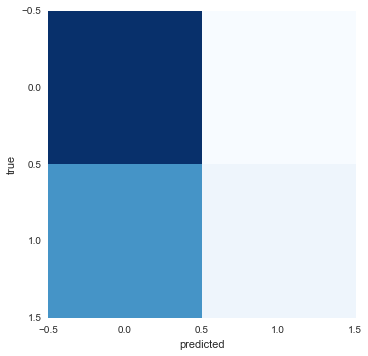

In [14]:
classifier = SVC()
classifier.fit(x_train_attending,y_train_attending)

ypred = classifier.predict(x_test_attending)
print(classification_report(y_test_attending,ypred))
print(confusion_matrix(y_test_attending,ypred))
plt.imshow(np.log(confusion_matrix(y_test_attending,ypred)),
          cmap='Blues',interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [15]:
def predict_attending(hs_gpa,visited,class_percentile,distance):
    if classifier.predict([hs_gpa,visited,class_percentile,distance]) == [0]:
        return "Not Attending"
    else:
        return "Is Attending"


print(predict_attending(4.0,1,95,100))
print(predict_attending(2.5,0,65,40))
print(predict_attending(3.5,1,50,100))
print(predict_attending(4.0,1,90,1))


Not Attending
Not Attending
Is Attending
Is Attending


### Next SVM

Response Variable: 

       Accepted to Luther or not.

             precision    recall  f1-score   support

          0       0.99      0.51      0.67       275
          1       0.87      1.00      0.93       935

avg / total       0.90      0.89      0.87      1210

[[139 136]
 [  1 934]]


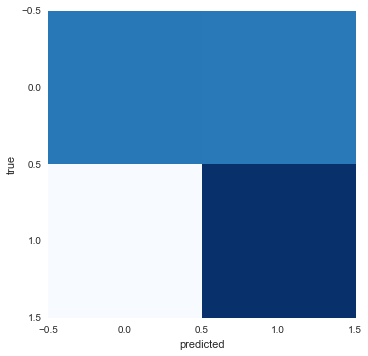

In [16]:
classifier = SVC()
classifier.fit(x_train_accepted,y_train_accepted)

ypred = classifier.predict(x_test_accepted)
print(classification_report(y_test_accepted,ypred))
print(confusion_matrix(y_test_accepted,ypred))
plt.imshow(np.log(confusion_matrix(y_test_accepted,ypred)),
          cmap='Blues',interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [20]:
def predict_accepted(hs_gpa,visited,class_percentile,distance):
    if classifier.predict([hs_gpa,visited,class_percentile,distance]) == [0]:
        return "Not Accepted to Luther"
    else:
        return "Accepted to Luther"


print(predict_accepted(4.0,1,95,100))
print(predict_accepted(2.5,0,65,40))
print(predict_accepted(0.5,1,0,25))
print(predict_accepted(2.0,0,100,0))

Accepted to Luther
Accepted to Luther
Not Accepted to Luther
Accepted to Luther


### Next SVM

Response Variable: 

       Final decision on Luther (denied, accepted not attending, attending).

             precision    recall  f1-score   support

          0       0.97      0.56      0.71       296
          1       0.67      0.96      0.79       694
          2       0.45      0.09      0.15       220

avg / total       0.71      0.71      0.65      1210

[[165 129   2]
 [  3 669  22]
 [  2 198  20]]


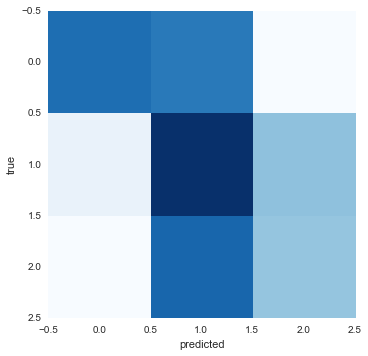

In [18]:
classifier = SVC()
classifier.fit(x_train_final,y_train_final)

ypred = classifier.predict(x_test_final)
print(classification_report(y_test_final,ypred))
print(confusion_matrix(y_test_final,ypred))
plt.imshow(np.log(confusion_matrix(y_test_final,ypred)),
          cmap='Blues',interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [19]:
def predict_final(hs_gpa,visited,class_percentile,distance):
    if classifier.predict([hs_gpa,visited,class_percentile,distance]) == [0]:
        return "Denied to Luther"
    elif classifier.predict([hs_gpa,visited,class_percentile,distance]) == [1]:
        return "Accepted to Luther, not Attending"
    else:
        return "Attending Luther"


    
print(predict_final(1.5,1,0,25))
print(predict_final(4.0,1,95,100))
print(predict_final(2.5,0,65,40))
print(predict_final(3.5,1,50,100))
print(predict_final(4.0,1,90,1))

Denied to Luther
Accepted to Luther, not Attending
Accepted to Luther, not Attending
Attending Luther
Accepted to Luther, not Attending



### -------------------------------------------------------------------------------------------------------


### Decision Trees



Found in R using party library.  These trees are a useful tool for someone to quickly look and see where they fall given certain covariates, and find whether they will be accepted or attend Luther.

### Tree \#1

Response:

        Attending Luther
        
Covariates:
        
        Visited Luther
        ACT Score
        High School GPA

<img src="tree1.png">

### Tree \#2

Response:

        Attending Luther
        
Covariates:
        
        Distance to Luther

<img src="tree2.png">

### Tree \#3

Response:

        Accepted to Luther
        
Covariates:
        
        High School GPA

<img src="tree3.png">